In [1]:
import os
os.chdir("E:\machine hack\CCPP_participants_Data")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
train.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [7]:
train.skew()

AT   -0.149024
V     0.177096
AP    0.240197
RH   -0.423511
PE    0.322296
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000095FE245C88>]],
      dtype=object)

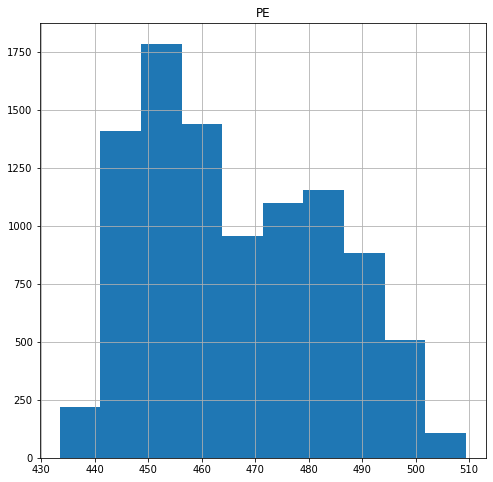

In [8]:
train.hist(column='PE',figsize=(8,8))

In [9]:
y = train['PE']

In [10]:
y

0       449.371855
1       450.861043
2       460.894029
3       467.577314
4       469.805723
           ...    
9563    499.615488
9564    461.130122
9565    481.245635
9566    490.928341
9567    457.630310
Name: PE, Length: 9568, dtype: float64

In [11]:
X = train[['AT','V','AP','RH']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000095FE98E288>,
      dtype=object)

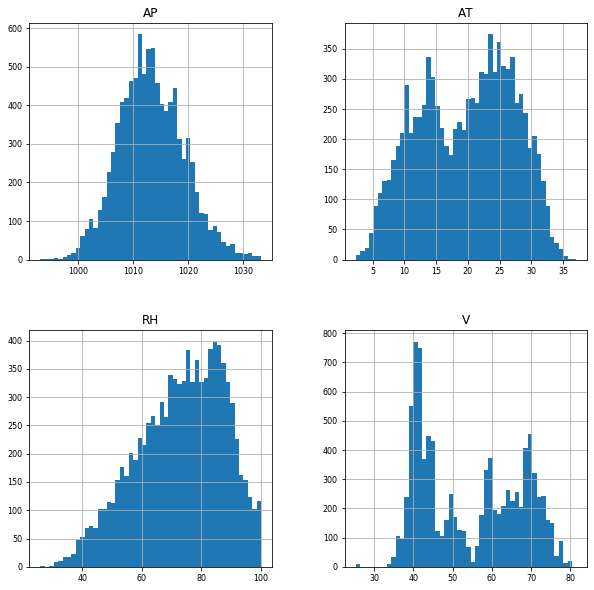

In [12]:
X.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
#train['ln_PE']=np.log(train['PE'])
train.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [14]:
train.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [15]:
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import kstest

In [17]:
# normality test
result = anderson(train['PE'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 140.656
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [19]:
# normality test - 
stat, p = shapiro(train['PE'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\santhosh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
kstest(train['PE'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

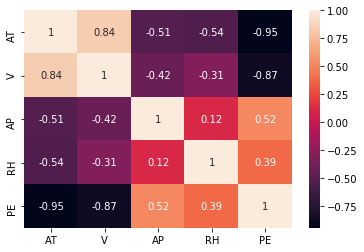

In [21]:
sns.heatmap(train.corr(),annot=True)

In [22]:
train.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.842054,-0.514305,-0.541602,-0.946352
V,0.842054,1.000000,-0.415093,-0.306395,-0.867356
AP,-0.514305,-0.415093,1.000000,0.115454,0.520058
RH,-0.541602,-0.306395,0.115454,1.000000,0.387785
PE,-0.946352,-0.867356,0.520058,0.387785,1.000000


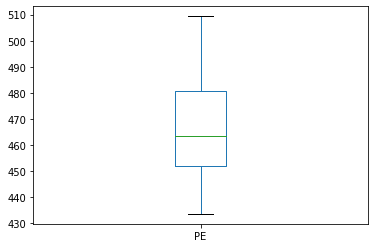

In [23]:
train['PE'].plot(kind='box')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [27]:
X_train.head()

,AT,V,AP,RH
2678,14.13,40.75,1016.05,72.41
370,31.54,72.58,1007.61,65.57
6951,19.05,59.21,1017.99,89.53
1562,26.26,74.90,1003.85,81.94
6993,17.52,44.05,1008.87,85.67


In [28]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn import metrics as m

In [34]:
linear = LinearRegression(normalize=False)

In [35]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
linear_pred = linear.predict(X_test)

In [37]:
LINEAR = np.sqrt(m.mean_squared_error(y_test,linear_pred))
LINEAR

4.767085779159174

In [38]:
#Mean_ABSOLUTE_ERROR  =  m.mean_absolute_error(y_test,linear_pred)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [40]:
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params' : {
            
        }
    },
    'DecisionTree_regressor' : {
        'model': DecisionTreeRegressor(),
        'params': {            
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(),
        'params': {
        }
    },
    'GradientBoostingRegressor' : {
        'model': GradientBoostingRegressor(),
        'params': {
        }
    },
    'RandomForestRegressor' : {
        'model': RandomForestRegressor(),
        'params': {
        }
    },
    'AdaBoost' : {
        'model': AdaBoostRegressor(),
        'params': {
        }
    }
}

In [41]:
##Normal train & test
scores = []
best_estimators = {}
cv_res = {}
for algo, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'],return_train_score=False)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    #y_score = clf.predict_proba(X_test)[:,1]
    
       
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'mean_absolute_error' : m.mean_absolute_error(y_test,y_pred),
        'mean_squared_error': m.mean_squared_error(y_test,y_pred),
        'Root_mean_squared_Error': np.sqrt(m.mean_squared_error(y_test,y_pred)),
        'R_squared_Error': m.r2_score(y_test, y_pred),
        'explained_variance':m.explained_variance_score(y_test, y_pred)})
    
    best_estimators[algo] = clf.best_estimator_
    
        
df = pd.DataFrame(scores,columns=['model','best_score','mean_absolute_error', 'mean_squared_error', 'Root_mean_squared_Error','R_squared_Error','explained_variance'])
df

,model,best_score,mean_absolute_error,mean_squared_error,Root_mean_squared_Error,R_squared_Error,explained_variance
0,Linear_Regression,0.926033,3.758565,22.725107,4.767086,0.921196,0.921248
1,DecisionTree_regressor,0.947457,2.417285,14.355402,3.788852,0.950220,0.950220
2,XGBRegressor,0.966713,2.165609,8.889071,2.981455,0.969175,0.969176
3,GradientBoostingRegressor,0.947102,3.027840,15.675998,3.959293,0.945640,0.945645
4,RandomForestRegressor,0.967301,2.031253,8.416116,2.901054,0.970815,0.970838
5,AdaBoost,0.905049,4.321107,28.910379,5.376837,0.899747,0.900329


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
#pipelines = []
#pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
#pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
#pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
#pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
#pipelines.append(('ScaledRF', Pipeline([('RF', RandomForestRegressor())])))
#pipelines.append(('ScaledXGB', Pipeline([('XGB', XGBRegressor())])))

#results = []
#names = []
#for name, model in pipelines:
 #   kfold = KFold(n_splits=10, random_state=1,shuffle=True)
  #  cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_root_mean_squared_error')
   # results.append(cv_results)
    #names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

In [44]:
rf = RandomForestRegressor()

In [45]:
rf.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
rf_pred = rf.predict(X_test)
RMSE = np.sqrt(m.mean_squared_error(y_test,rf_pred))
RMSE

2.9131895756213253

In [47]:
rf_gs_pred_test = rf.predict(test)

In [48]:
rf_gs_pred_test

array([473.30953943, 493.22130218, 496.25270629, ..., 471.12773129,
       447.27705599, 465.64423559])

In [51]:
result = pd.DataFrame(rf_gs_pred_test,columns=['PE'])
result

,PE
0,473.309539
1,493.221302
2,496.252706
3,480.343858
4,448.239615
...,...
38267,474.671397
38268,447.074564
38269,471.127731
38270,447.277056


In [52]:
result.to_csv('E:\machine hack\CCPP_participants_Data\submission.csv',index=False,header=True)